# Introdução à Ciência de Dados - UFPB 
#### Professor: Yuri Malheiros
## Projeto Final   

<img src="formula_1.png" style="width:500px;height:125px"/>

### Caio Araújo e William Xavier  


Neste projeto analisaremos diversos dados sobre as corridas de Fórmula 1 desde seu início em 1950 até 2020.  
Dados como: maiores vencedores, números de acidentes, evolução das velocidades com o passar dos anos, etc.

## Quais pilotos venceram mais corridas desde 1950 até 2020 ?

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
sns.set_palette('Set2')

results = pd.read_csv("../../caiov/ICD/projeto_csv/results.csv")
drivers = pd.read_csv("../../caiov/ICD/projeto_csv/drivers.csv")

In [2]:
results = results.drop(["statusId", "points", "positionText", "number", "position", "milliseconds"], axis=1)
results = results.rename(columns={"positionOrder":"Vitórias_P"})
results = results[results.Vitórias_P == 1]

drivers = drivers.loc["0":,"driverId":"nationality"]
drivers["Pilotos"] = drivers["forename"] + " " + drivers["surname"]
drivers = drivers.drop(["dob","number","forename","surname"], axis=1)
drivers = drivers.reindex(columns=['driverId','driverRef','code','Pilotos','nationality'])

drivers_results = pd.merge(drivers,results, on="driverId")

drivers_wins = drivers_results.groupby("Pilotos").count()
drivers_wins = drivers_wins.sort_values(by="Vitórias_P", ascending=False)[["Vitórias_P"]]
d_w_barplot = drivers_wins.iloc[:10]
drivers_wins.iloc[:15]

,Vitórias_P
Pilotos,
Lewis Hamilton,96
Michael Schumacher,91
Sebastian Vettel,53
Alain Prost,51
Ayrton Senna,41
Fernando Alonso,32
Nigel Mansell,31
Jackie Stewart,27
Niki Lauda,25


<img src="hamilton.jpg" style="width:500px;height:350px"/>

Análise: Vemos que Lewis Hamilton após **15 temporadas** na Fórmula 1, e **267 GP's** disputados, alcançou o recorde do grande campeão Michael Schumacher que era de **91 vitórias** em **308 GP's**, que disputou durante **19 temporadas**, estabelecendo o recorde que atualmente é de **96 vitórias**. Ambos possuem **7 títulos** da Fórmula 1.

## Medidas de Centralidade e Dispersão

In [3]:
Medidas_P = {"Média": drivers_wins["Vitórias_P"].mean(),
                  "Mediana": drivers_wins["Vitórias_P"].median(),
                  "Desvio Padrão": drivers_wins["Vitórias_P"].std()}
medidas_p = pd.Series(Medidas_P)

d_w_medidas = pd.DataFrame({"Vitórias_P": medidas_p})
d_w_medidas

,Vitórias_P
Média,9.445455
Mediana,4.000000
Desvio Padrão,15.269798


Análise: A **média** encontrada a partir desses valores não condiz muito com os dados que vemos em nosso **top 15**, pois há vários
    pilotos que venceram um GP, mas não seguiram vencendo, fazendo com que a média baixe, é por isso que temos um **desvio padrão** tão elevado.

## Boxplot

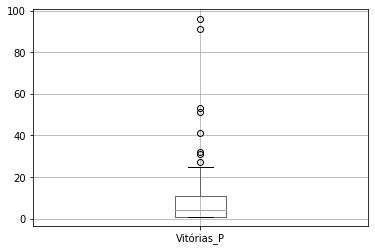

In [4]:
drivers_wins.boxplot(column="Vitórias_P")

## Gráfico de Barra

Text(0.5, 1.0, 'Top 10 Pilotos Vencedores')

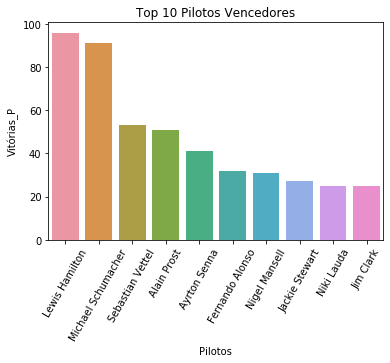

In [5]:
d_w_barplot = d_w_barplot.reset_index()
sns.barplot(data=d_w_barplot, x="Pilotos", y="Vitórias_P")
plt.xticks(rotation=60)
plt.title("Top 10 Pilotos Vencedores")

## Quais montadoras/equipes venceram mais corridas ?

In [6]:
teams = pd.read_csv("../../caiov/ICD/projeto_csv/constructors.csv")

In [7]:
teams_results = pd.merge(teams,results, on="constructorId")
teams_results = teams_results.drop(["constructorRef","url"], axis=1)

teams_results = teams_results.rename(columns={"name":"Equipes"})
teams_results = teams_results.rename(columns={"constructorId":"Vitórias_E"})

teams_wins = teams_results.groupby("Equipes").count()
teams_wins = teams_wins.sort_values(by="Vitórias_E", ascending=False)[["Vitórias_E"]]
t_w_barplot = teams_wins.iloc[:10]
teams_wins.iloc[:15]

,Vitórias_E
Equipes,
Ferrari,239
McLaren,178
Mercedes,116
Williams,114
Red Bull,64
Team Lotus,45
Renault,35
Benetton,27
Brabham,23


<img src="ferrari.jpg" style="width:450px;height:325px"/>

Análise: Aqui vemos a hegemonia no quesito mais vitórias da Ferrari, fundada em 1939 por **Enzo Ferrari**, a equipe **Scuderia Ferrari**
    é a equipe **mais antiga** em atividade na Fórmula 1, é a única a ter competido em todas as temporadas do mundial até hoje.
    Curiosamente a Ferrari só veio a ganhar seu primeiro GP em **1951** na **Grã-Bretanha**, perdendo todos os 11 GP's disputados em
    1950 para a equipe **Alfa Romeo** que mais tarde, em 1951, se retirou da Fórmula 1.
    

## Medidas de Centralidade e Dispersão

In [8]:
Medidas_E = {"Média": teams_wins["Vitórias_E"].mean(),
                  "Mediana": teams_wins["Vitórias_E"].median(),
                  "Desvio Padrão": teams_wins["Vitórias_E"].std()}
medidas_e = pd.Series(Medidas_E)

t_w_medidas = pd.DataFrame({"Vitórias_E": medidas_e})
t_w_medidas

,Vitórias_E
Média,22.586957
Mediana,4.000000
Desvio Padrão,47.768226


Análise: Pelo mesmo motivo citado acima aqui vemos um **desvio padrão muito elevado** pela quantidade de equipes que já disputaram
    algum GP na fórmula 1, que são 46 equipes listadas nos dados encontrados.

## Boxplot

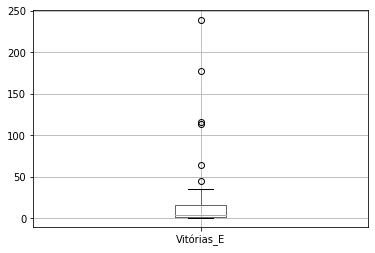

In [9]:
teams_wins.boxplot(column="Vitórias_E")

## Gráfico de Barra

Text(0.5, 1.0, 'Top 10 Equipes Vencedores')

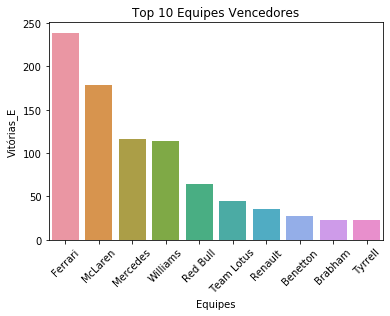

In [10]:
t_w_barplot = t_w_barplot.reset_index()
sns.barplot(data=t_w_barplot, x="Equipes", y="Vitórias_E")
plt.xticks(rotation=45)
plt.title("Top 10 Equipes Vencedores")

## Acidentes + Colisões por Temporada
Com carros que chegam a mais de 300Km/h em uma corrida, a possibilidade de acontecer acidentes neste esporte é grande. É por isso que analisaremos as temporadas que mais ocorreram acidentes na Fórmula 1, e veremos mais tarde medidas que foram tomadas
para evitar que tais acontececem. 

In [11]:
races = pd.read_csv("../../caiov/ICD/projeto_csv/races.csv")
estatistica = pd.read_csv("../../caiov/ICD/projeto_csv/status.csv")
resultados = pd.read_csv("../../caiov/ICD/projeto_csv/results.csv")

df_acidentes = resultados[(resultados.statusId == 3) | (resultados.statusId == 4)]
df_acidentes = df_acidentes.drop(["points", "position", "positionText", "number", "time", "milliseconds", 
                            "fastestLap", "fastestLapTime", "fastestLapSpeed","laps", "rank", "positionOrder"], axis=1)

In [12]:
newdata = pd.merge(races, df_acidentes, on="raceId")
newdata = newdata.drop(["url", "grid", "time", "round", "date", "resultId",
                        "driverId","raceId", "circuitId", "constructorId","name","statusId"], axis=1)
newdata = newdata.rename(columns={"year":"Temporada"})

q_acidentes = np.full((1834), 1)
newdata["Acidentes"]= q_acidentes

newdata = newdata.reset_index(drop=True)
newdata = newdata.groupby("Temporada").sum()
newdata = newdata.sort_values(by="Acidentes", ascending=False)
newdata.iloc[:10]

,Acidentes
Temporada,
1977,63
1975,54
1976,50
1994,49
1978,49
1981,48
2012,43
2010,42
2006,41


Análise: Nestes dados vemos claramente um **alto índice** de acidentes em alguns anos da **década de 70**, em um gráfico que será mostrado abaixo será possível ver o que **possivelmente causou** tantos acidentes neste período.

## Medidas de Centralidade e Dispersão

In [13]:
Medidas_A = {"Média": newdata["Acidentes"].mean(),
                  "Mediana": newdata["Acidentes"].median(),
                  "Desvio Padrão": newdata["Acidentes"].std()}
medidas_a = pd.Series(Medidas_A)

d_a_medidas = pd.DataFrame({"Acidentes": medidas_a})
d_a_medidas

,Acidentes
Média,25.472222
Mediana,25.000000
Desvio Padrão,12.844654


## Boxplot

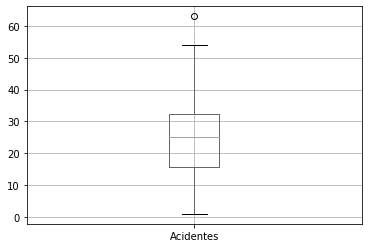

In [14]:
newdata.boxplot(column="Acidentes")

## Histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021253425488>]],
      dtype=object)

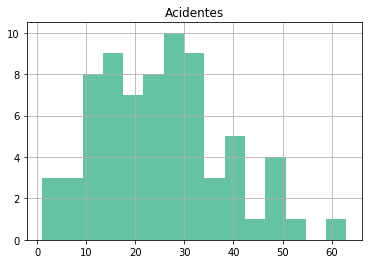

In [15]:
newdata.hist(column="Acidentes", bins=15)

## Gráfico de dispersão (Agrupamento)

In [16]:
newdata = newdata.reset_index()

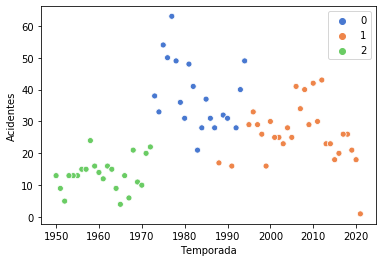

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(newdata)
sns.scatterplot(data=newdata, x="Temporada", y="Acidentes", hue=kmeans.labels_, palette="muted")

## Gráfico de Linha

Text(0.5, 1.0, 'Acidentes por temporada')

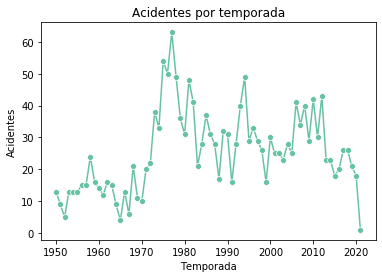

In [18]:
newdata = newdata.reset_index()
sns.lineplot(data=newdata, x="Temporada", y="Acidentes", marker="o")
plt.title("Acidentes por temporada")

Análise: Como citamos acima podemos observar um **alto índice** de acidentes na decáda de 70 e também entre os **anos 2005-2012**,
    seguido de uma queda destes números, quais foram os **fatores que culminaram** neste **declínio**?

## DataFrame - Fórmula 1
Aqui nós transformamos e limpamos alguns outros dados que estevam separados, para que pudéssemos fazer outras análises mais profundas
como:   
* Analisar as velocidades dos carros no decorrer dos anos;  
* Fazer uma comparação entre os pilotos da década de 50 e os atuais;  
* Calcular e analisar porcentagens da relação Pole-Vitória.

In [19]:
pd.options.display.float_format = '{:.2f}'.format

races = pd.read_csv("../../caiov/ICD/projeto_csv/races.csv")
races = races.drop(["time","url"], axis=1)

teams_results2 = pd.merge(results,teams, on="constructorId")
teams_results2 = teams_results2.drop(["constructorRef","url", "Vitórias_P"], axis=1)
teams_results2 = teams_results2.drop(["nationality","raceId","resultId","grid","laps",
                                      "time","fastestLap","rank","fastestLapTime","fastestLapSpeed"], axis=1)
teams_results2 #(F15)

drivers_results2 = pd.merge(results, drivers, on="driverId")
drivers_results2 = drivers_results2.rename(columns={"Vitórias_P":"Posição_Final"})
drivers_results2 #(F10)

t_d_results = pd.merge(teams_results2,drivers_results2, on=["driverId","constructorId"])
t_d_results = t_d_results.drop(["rank","fastestLap","driverRef","laps","resultId"],axis=1)
t_d_results = t_d_results.reindex(columns=["raceId","driverId","Pilotos","code","nationality","constructorId","name",
                                           "grid","Posição_Final","time","fastestLapTime","fastestLapSpeed"])

t_d_results = t_d_results.rename(columns={"name":"Montadoras"})

formula_1 = pd.merge(t_d_results,races, on="raceId")
formula_1 = formula_1.reindex(columns=["raceId","round","circuitId","name","date","year","driverId","Pilotos","code","nationality",
                                       "Montadoras","constructorId","grid","Posição_Final","time","fastestLapTime","fastestLapSpeed"])
formula_1 = formula_1.drop_duplicates()
formula_1 = formula_1.sort_values(by="date")

## Análise Tempo 

As corridas de Fórmula 1 sempre envolveram muita **velocidade**, era certo que com o passar dos anos as equipes de **engenheiros** 
melhorariam cada vez mais os carros, que teriam **motores mais potentes** e uma **melhor aerodinâmica** tudo em troca de mais
velocidade. Entretando como vimos acima os acidentes também se acentuaram. Aqui veremos a **evolução das velocidades** dos carros, e as **medidas de segurança** que foram tomadas para garantir a preservação da vida dos pilotos.

In [20]:
formula_1_speed =  formula_1
formula_1_speed = formula_1_speed.drop(["round","driverId",
                          "code","constructorId","fastestLapTime","fastestLapSpeed"], axis=1)

formula_1_speed = formula_1_speed[(formula_1_speed.circuitId == 6) | (formula_1_speed.circuitId == 14) | 
                                  (formula_1_speed.circuitId == 18) | (formula_1_speed.circuitId == 9)]

formula_1_speed = formula_1_speed.drop(14186)
formula_1_speed = formula_1_speed.sort_values(by="circuitId")

formula_1_speed_t = formula_1_speed["time"]
formula_1_speed_dt = pd.to_datetime(formula_1_speed_t, format='%H:%M:%S.%f', errors='ignore')
formula_1_speed_seconds = (formula_1_speed_dt.dt.hour*60+formula_1_speed_dt.dt.minute)*60 + formula_1_speed_dt.dt.second
formula_1_speed["Seconds"] = formula_1_speed_seconds

Text(0.5, 1.0, 'Análise Tempos')

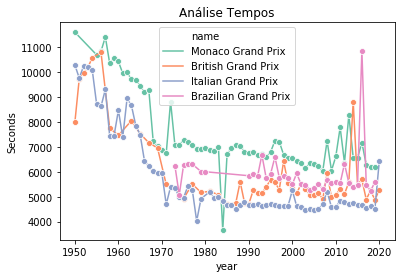

In [21]:
sns.lineplot(data=formula_1_speed, x="year", y="Seconds", hue="name", marker="o")
plt.title("Análise Tempos")

Análise: Podemos observar que aproximadamente no ano de 2010 houve uma mudança brusca na variação dos tempos que estavam em constante diminuição. Tal acontecimento foi ocasionado por uma série de mudanças em algumas regras da Fórmula 1, como: 

* **Volta da regra de 107%** (*Durante a qualificação, o piloto que não efetuar uma volta dentro de 107% do menor tempo na primeira sessão de qualificação não pode começar a corrida*);
* **Proibição de ordens de equipe** (*Equipe não pode exigir ultrapassagens para favorecer um determinado piloto*);  
* **Novas normas técnicas impostas pela pirelli;**  
* **Mudanças na aerodinâmica dos carros;**  
* **Leve aumento do peso mínimo dos veículos;**  
* **Impedimento de acessar o circuito 9 horas antes da primeira sessão do dia.**

Essas mudanças favoreceram a segurança dos pilotos e de todas as pessoas envolvidas na organização da corrida, como pode ser observado no gráfico abaixo:

Text(0.5, 1.0, 'Acidentes por temporada')

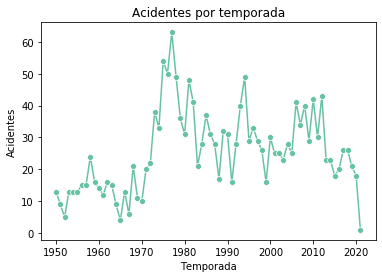

In [22]:
sns.lineplot(data=newdata, x="Temporada", y="Acidentes", marker="o")
plt.title("Acidentes por temporada")

Análise: Houve uma diminuição na quantidade de acidentes por volta da temporada de 2013, demostrando a eficácia das novas normas impostas pela FIA (Federação Internacional do Automóvel). Em suma, os carros se tornaram levemente mais lentos, mas as corridas se tornaram mais seguras, o que eticamente foi a decisão mais correta para evitar a morte de profissionais deste esporte que vem nos impressionando ao longo dos anos com tamanha velocidade e adrenalina.

## Porcentagem Pole-Vitória
Na Fórmula 1 os pilotos fazem um **treino qualificatória** na pista para decidir as posições de largada da corrida, o piloto que tem o **tempo mais rápido** neste treino larga em primeiro, ele possui o que é chamado de **Pole Position** ( _Primeira Posição_ ). O piloto que larga em primeiro tem a **vantagem**, mas nem sempre ele é o que vence a corrida, as vezes um piloto
retardatário rouba-lhe a vitória, é por isso que vamos analisar a **porcentagem de vitória** dos pilotos que largam em 1°, 2° e 3° lugar.

In [23]:
soma_p = formula_1['Posição_Final'].sum()

soma_grid = formula_1[formula_1.grid == 1]
soma_grid = soma_grid["grid"].count()
porc = (soma_grid * 100) / soma_p

soma_grid_2 = formula_1[formula_1.grid == 2]
soma_grid_2 = soma_grid_2["grid"].count()
porc_2 = (soma_grid_2 * 100) / soma_p

soma_grid_3 = formula_1[formula_1.grid == 3]
soma_grid_3 = soma_grid_3["grid"].count()
porc_3 = (soma_grid_3 * 100) / soma_p

In [24]:
valores_dict = {"Q1":porc, "Q2":porc_2, "Q3":porc_3}
valores_dict_2 = {"Q1":"1°", "Q2":"2°", "Q3":"3°"}

valores = pd.Series(valores_dict)
valores_2 = pd.Series(valores_dict_2)

porc_valores = pd.DataFrame({"Saída":valores_2 ,"Porcentagem":valores_dict})
porc_valores

,Saída,Porcentagem
Q1,1°,41.87
Q2,2°,23.97
Q3,3°,12.32


Análise: Podemos observar que a diferença entre essas 3 posições cai quase **pela metade** quando vamos aumentando uma posição, além disso podemos ver que apenas **41,87%** dos pilotos que largaram na primeira posição em toda a história ganharam a corrida, então **mais da metade** desses pilotos **não conseguiram** a **vitória** após terem obtido o melhor tempo no treino classificatório, tal fato demonstra o quão **imprevisíveis** são as corridas da Fórmula 1.

# Dados Monaco (1950-1968) e (2005-2019)

## Monaco (1950-1968)

In [ ]:
Monaco_1 = formula_1[formula_1.circuitId == 6]
Monaco_1 = Monaco_1[Monaco_1.year <= 1968]
Monaco_1 = Monaco_1.sort_values(by="time")
Monaco_1 = Monaco_1.drop(["raceId","round","driverId","circuitId",
                          "code","constructorId","fastestLapTime","fastestLapSpeed"], axis=1)
Monaco_1 = Monaco_1.reset_index(drop=True)

#Transformando tempo em str para segundos.
Monaco_1_time = Monaco_1["time"]
Monaco_1_dt = pd.to_datetime(Monaco_1_time, format='%H:%M:%S.%f', errors='ignore')
Monaco_1_seconds = (Monaco_1_dt.dt.hour*60+Monaco_1_dt.dt.minute)*60 + Monaco_1_dt.dt.second
Monaco_1["Seconds"] = Monaco_1_seconds
Monaco_1

In [ ]:
sns.lineplot(data=Monaco_1, x="date", y="Seconds", marker="o")
plt.xticks(rotation=90)

## Monaco (2005-2019)

In [ ]:
Monaco_2 = formula_1[formula_1.circuitId == 6]
Monaco_2 = Monaco_2[Monaco_2.year >= 2005]
Monaco_2 = Monaco_2.sort_values(by="time")
Monaco_2 = Monaco_2.drop(["raceId","round","driverId","circuitId","constructorId","fastestLapSpeed","fastestLapTime"], axis=1)
Monaco_2 = Monaco_2.reset_index(drop=True)

Monaco_2_time = Monaco_2["time"]
Monaco_2_dt = pd.to_datetime(Monaco_2_time, format='%H:%M:%S.%f', errors='ignore')
Monaco_2_seconds = (Monaco_2_dt.dt.hour*60+Monaco_2_dt.dt.minute)*60 + Monaco_2_dt.dt.second
Monaco_2["Seconds"] = Monaco_2_seconds
Monaco_2

In [ ]:
sns.lineplot(data=Monaco_2, x="year", y="Seconds", marker="o")

# Comparação Velocidades

In [ ]:
from scipy.stats import zscore

In [ ]:
z_score_1 = zscore(Monaco_1["Seconds"])
z_score_1

In [ ]:
z_score_2 = zscore(Monaco_2["Seconds"])
z_score_2

In [ ]:
Monaco_a = {"Média": Monaco_1["Seconds"].mean(),
                  "Desvio Padrão": Monaco_1["Seconds"].std(),
                       "Fastest Pilot": Monaco_1["Seconds"][0]}

Monaco_b = {"Média": Monaco_2["Seconds"].mean(),
                  "Desvio Padrão": Monaco_2["Seconds"].std(),
                       "Fastest Pilot": Monaco_2["Seconds"][0]}

medidas_a = pd.Series(Monaco_a)
medidas_b = pd.Series(Monaco_b)

d_ab_medidas = pd.DataFrame({"Monaco_1": medidas_a, "Monaco_2": medidas_b})
d_ab_medidas

In [ ]:
import scipy.stats as stats
import math
x_values = [6851.7,7908.6,8965.5,10022.4,11079.3,12136.2,13193.4]

mu = d_ab_medidas["Monaco_1"][0]
variance = d_ab_medidas["Monaco_1"][1]
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xticks(x_values)
plt.show()

In [ ]:
value = np.random.normal(loc=10022.4,scale=1000,size=1000)
sns.distplot(value)

In [ ]:
mu = d_ab_medidas["Monaco_2"][0]
variance = d_ab_medidas["Monaco_2"][1]
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [ ]:
Monaco_a = {"Piloto": Monaco_1["Pilotos"][0],
                  "Tempo": Monaco_1["time"][0],
                       "Z-Score": Monaco_1["Seconds"][0]}

Monaco_b = {"Piloto": Monaco_2["Pilotos"][0],
                  "Tempo": Monaco_2["time"][0],
                       "Z-Score": Monaco_2["Seconds"][0]}

medidas_a = pd.Series(Monaco_a)
medidas_b = pd.Series(Monaco_b)

battle_a_b = pd.DataFrame({"Monaco_1": medidas_a, "Monaco_2": medidas_b})
battle_a_b

# Dados Monza (1950-1964) e (2006-2020)

## Monza (1950-1964)

In [ ]:
Monza_1 = formula_1[formula_1.circuitId == 14]
Monza_1 = Monza_1[Monza_1.year <= 1964]
Monza_1 = Monza_1.sort_values(by="date")
Monza_1 = Monza_1.drop(["raceId","round","driverId","circuitId",
                          "code","constructorId","fastestLapTime","fastestLapSpeed"], axis=1)
Monza_1 = Monza_1.reset_index(drop=True)

#Transformando tempo em str para segundos.
Monza_1_time = Monza_1["time"]
Monza_1_dt = pd.to_datetime(Monza_1_time, format='%H:%M:%S.%f', errors='ignore')
Monza_1_seconds = (Monza_1_dt.dt.hour*60+Monza_1_dt.dt.minute)*60 + Monza_1_dt.dt.second
Monza_1["Seconds"] = Monza_1_seconds
Monza_1

## Monza (2006-2020)

In [ ]:
Monza_2 = formula_1[formula_1.circuitId == 14]
Monza_2 = Monza_2[Monza_2.year >= 2006]
Monza_2 = Monza_2.sort_values(by="date")
Monza_2 = Monza_2.drop(["raceId","round","driverId","circuitId","constructorId","fastestLapSpeed","fastestLapTime"], axis=1)
Monza_2 = Monza_2.reset_index(drop=True)

Monza_2_time = Monza_2["time"]
Monza_2_dt = pd.to_datetime(Monza_2_time, format='%H:%M:%S.%f', errors='ignore')
Monza_2_seconds = (Monza_2_dt.dt.hour*60+Monza_2_dt.dt.minute)*60 + Monza_2_dt.dt.second
Monza_2["Seconds"] = Monza_2_seconds
Monza_2